Evolution Strategy for Multi-Modal Function Optimization
Function: Rastrigin
Bounds: (-5.12, 5.12)
Dimension: 2
ES Parameters: mu=10, lambda=50, sigma=1.0, max_iter=100

Visualizing the Rastrigin function...


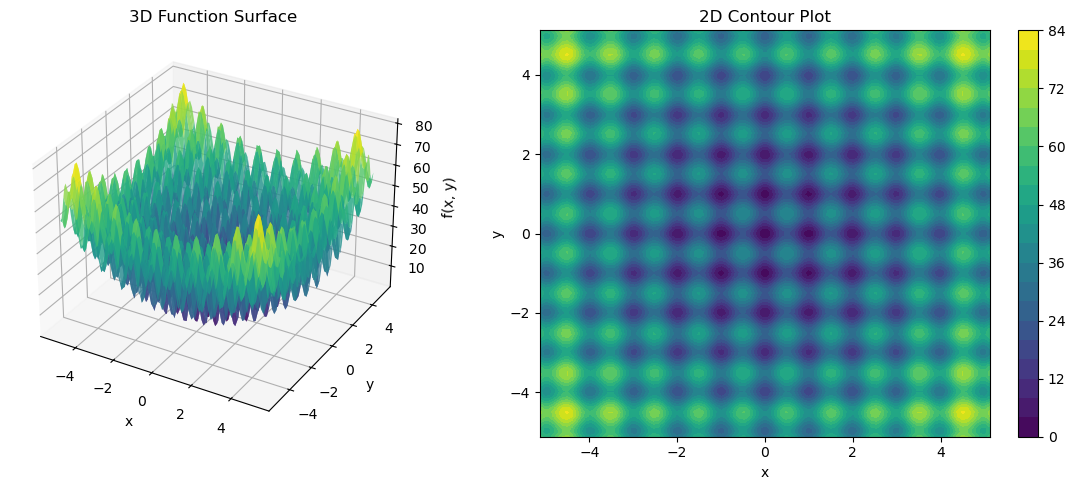


Running the (μ/μ, λ)-ES optimization...
Iteration 0: Best fitness = 10.164485, Mean fitness = 16.241112, Sigma = 0.800000, Time = 0.016s
Iteration 10: Best fitness = 0.128521, Mean fitness = 0.643767, Sigma = 0.085899, Time = 0.000s
Iteration 20: Best fitness = 0.000369, Mean fitness = 0.006088, Sigma = 0.009223, Time = 0.008s
Iteration 30: Best fitness = 0.000025, Mean fitness = 0.000145, Sigma = 0.000990, Time = 0.000s
Iteration 40: Best fitness = 0.000000, Mean fitness = 0.000002, Sigma = 0.000106, Time = 0.000s
Iteration 50: Best fitness = 0.000000, Mean fitness = 0.000000, Sigma = 0.000011, Time = 0.000s
Iteration 60: Best fitness = 0.000000, Mean fitness = 0.000000, Sigma = 0.000001, Time = 0.000s
Iteration 70: Best fitness = 0.000000, Mean fitness = 0.000000, Sigma = 0.000000, Time = 0.018s
Iteration 80: Best fitness = 0.000000, Mean fitness = 0.000000, Sigma = 0.000000, Time = 0.000s
Iteration 90: Best fitness = 0.000000, Mean fitness = 0.000000, Sigma = 0.000000, Time = 0.016

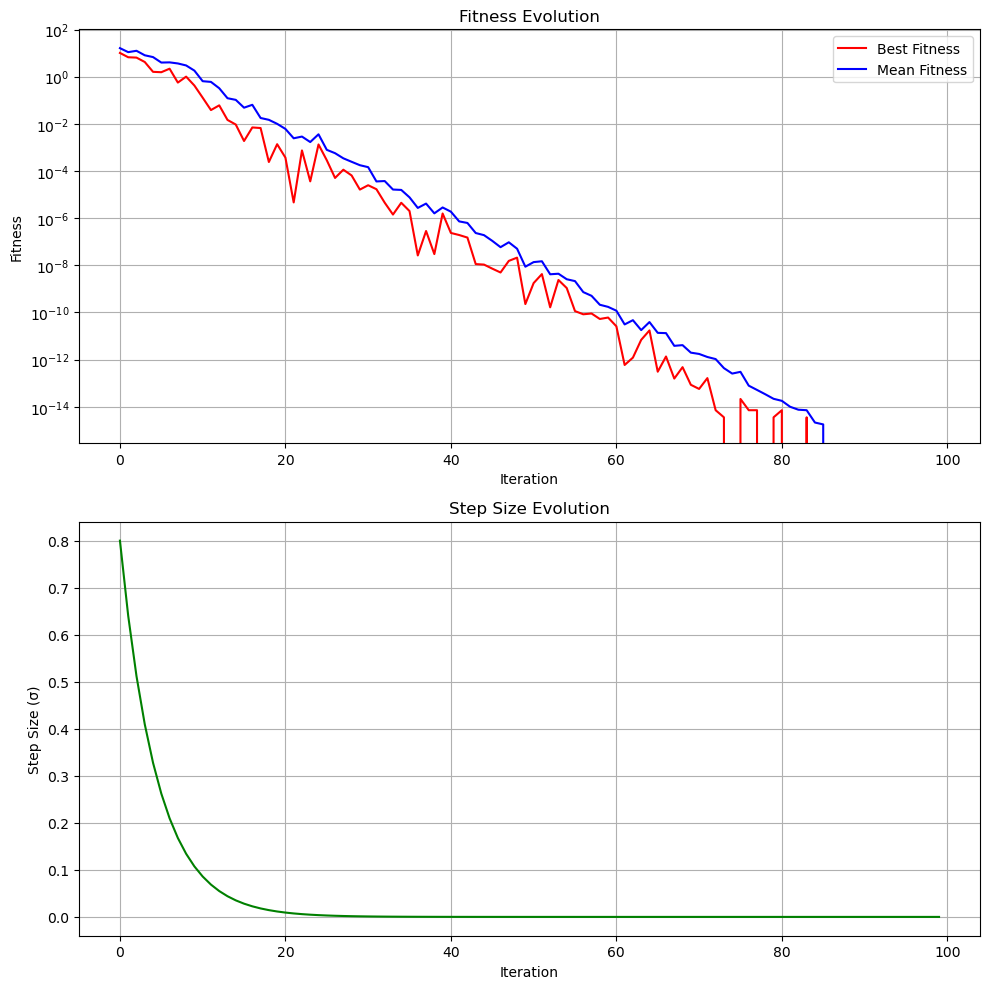


Plotting optimization trajectory...


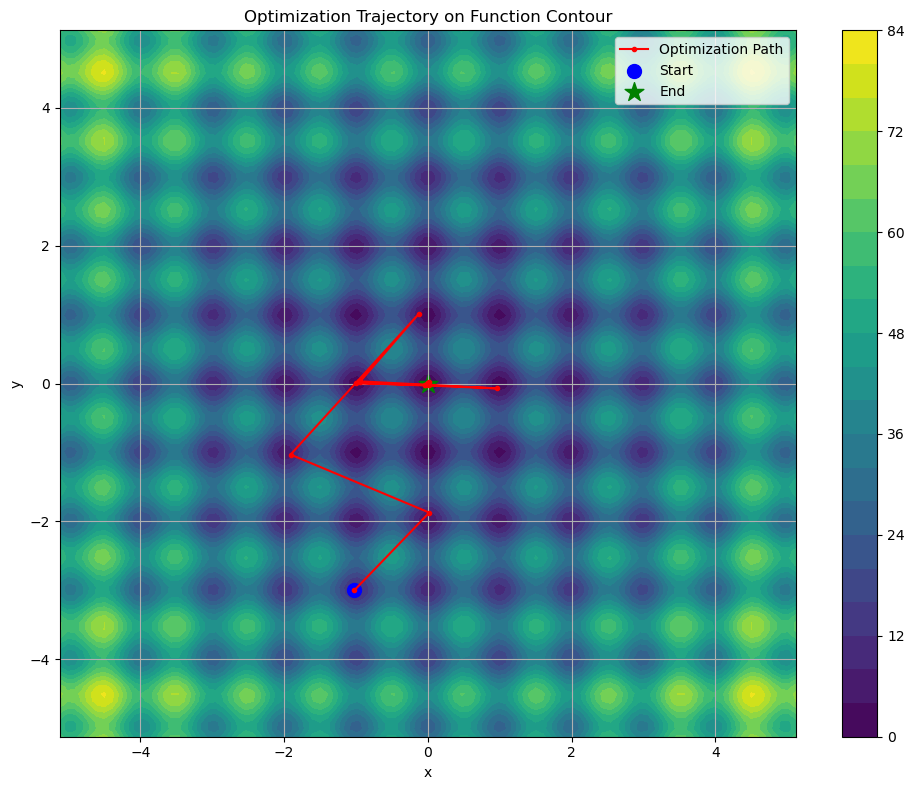


Comparing different ES configurations on various objective functions...

Optimizing Rastrigin with (1+1)-ES...
(1+1)-ES on Rastrigin:
  Best solution: [ 3.58160106 -0.47253688]
  Best fitness: 51.616810

Optimizing Rastrigin with (μ/μ, λ)-ES...
(μ/μ, λ)-ES on Rastrigin:
  Best solution: [ 0.99495953 -0.99495594]
  Best fitness: 1.989918

Optimizing Ackley with (1+1)-ES...
(1+1)-ES on Ackley:
  Best solution: [ 1.10900083 -4.36684028]
  Best fitness: 11.088859

Optimizing Ackley with (μ/μ, λ)-ES...
(μ/μ, λ)-ES on Ackley:
  Best solution: [-5.09778130e-06  1.51444382e-06]
  Best fitness: 0.000015

Optimizing Griewank with (1+1)-ES...
(1+1)-ES on Griewank:
  Best solution: [1.6205189  3.51768624]
  Best fitness: 0.964310

Optimizing Griewank with (μ/μ, λ)-ES...
(μ/μ, λ)-ES on Griewank:
  Best solution: [-2.59379412e-06  2.54496286e-06]
  Best fitness: 0.000000


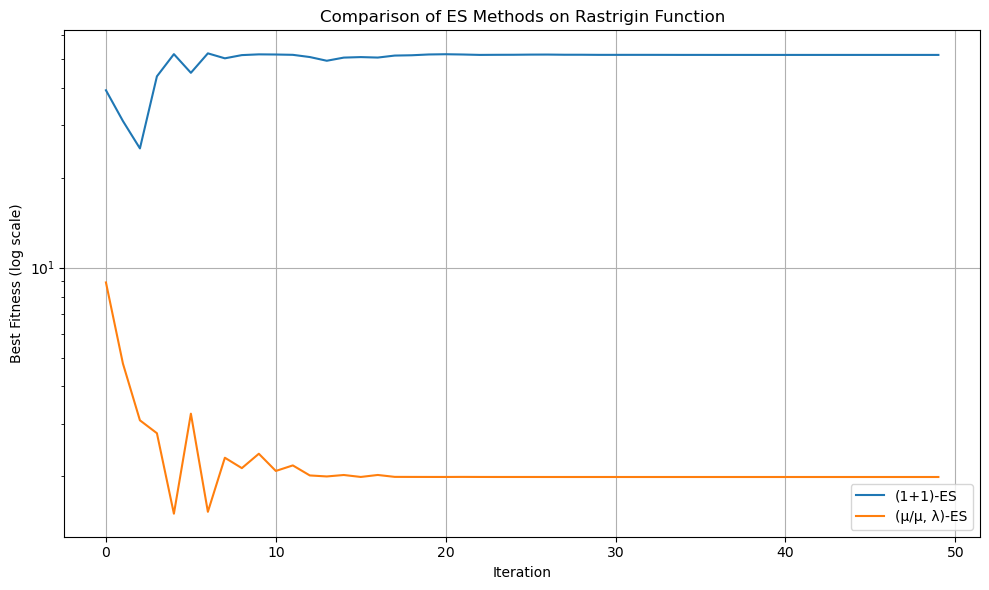

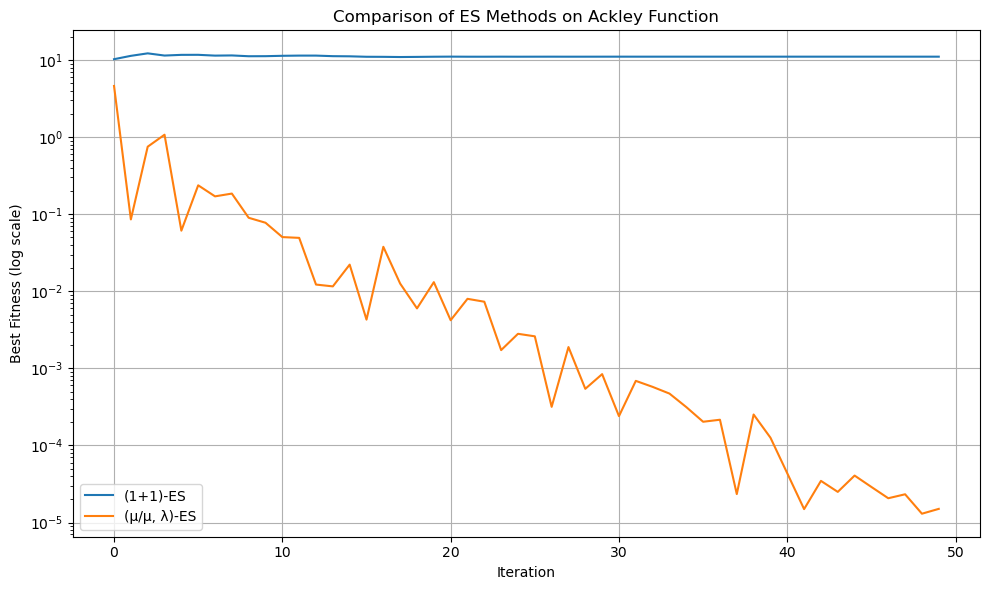

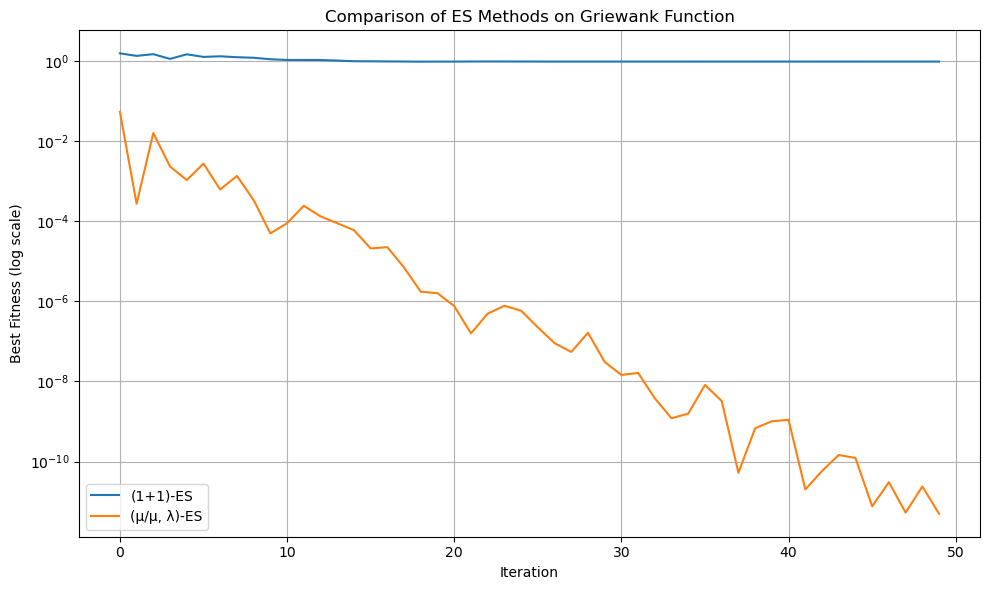

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import time
import random

class EvolutionStrategy:
    """
    Implementation of (μ/μ, λ)-ES for optimizing multi-modal functions.
    
    Attributes:
        mu (int): Number of parents
        lambda_ (int): Number of offspring
        bounds (tuple): Bounds of the search space (lower, upper)
        dim (int): Dimension of the search space
        sigma (float): Initial step size for mutation
        alpha (float): Learning rate for the step size adaptation
        max_iter (int): Maximum number of iterations
        population (numpy.ndarray): Current population of individuals
        fitness (numpy.ndarray): Fitness values of the population
    """
    
    def __init__(self, mu, lambda_, bounds, dim, sigma=1.0, alpha=0.2, max_iter=100):
        """
        Initialize the Evolution Strategy optimizer.
        
        Args:
            mu (int): Number of parents
            lambda_ (int): Number of offspring
            bounds (tuple): Bounds of the search space (lower, upper)
            dim (int): Dimension of the search space
            sigma (float): Initial step size for mutation
            alpha (float): Learning rate for the step size adaptation
            max_iter (int): Maximum number of iterations
        """
        self.mu = mu
        self.lambda_ = lambda_
        self.bounds = bounds
        self.dim = dim
        self.sigma = sigma
        self.alpha = alpha
        self.max_iter = max_iter
        
        # Initialize parent population randomly within bounds
        self.population = np.random.uniform(bounds[0], bounds[1], (mu, dim))
        self.fitness = np.zeros(mu)
        
    def evaluate_fitness(self, individual, objective_function):
        """
        Evaluate the fitness of an individual.
        
        Args:
            individual (numpy.ndarray): Individual to evaluate
            objective_function (callable): Objective function to minimize
            
        Returns:
            float: Fitness value of the individual
        """
        return objective_function(individual)
    
    def select_parents(self, offspring, offspring_fitness):
        """
        Select the best individuals from offspring as parents for the next generation.
        
        Args:
            offspring (numpy.ndarray): Offspring population
            offspring_fitness (numpy.ndarray): Fitness values of offspring
            
        Returns:
            tuple: Selected parents and their fitness values
        """
        # Sort offspring by fitness (lower is better)
        sorted_indices = np.argsort(offspring_fitness)
        selected_indices = sorted_indices[:self.mu]
        
        return offspring[selected_indices], offspring_fitness[selected_indices]
    
    def mutate(self, individual):
        """
        Mutate an individual using Gaussian mutation.
        
        Args:
            individual (numpy.ndarray): Individual to mutate
            
        Returns:
            numpy.ndarray: Mutated individual
        """
        # Apply Gaussian mutation
        mutation = np.random.normal(0, self.sigma, self.dim)
        mutated = individual + mutation
        
        # Enforce bounds
        mutated = np.clip(mutated, self.bounds[0], self.bounds[1])
        
        return mutated
    
    def adapt_sigma(self, success_rate):
        """
        Adapt the step size based on the success rate.
        
        Args:
            success_rate (float): Percentage of successful mutations
        """
        # 1/5 success rule
        target_success_rate = 0.2
        
        if success_rate > target_success_rate:
            self.sigma *= (1 + self.alpha)
        elif success_rate < target_success_rate:
            self.sigma *= (1 - self.alpha)
    
    def optimize(self, objective_function, verbose=True):
        """
        Optimize the objective function using Evolution Strategy.
        
        Args:
            objective_function (callable): Objective function to minimize
            verbose (bool): Whether to print progress information
            
        Returns:
            tuple: Best solution found and its fitness value
        """
        history = {
            'best_fitness': [],
            'mean_fitness': [],
            'best_solution': [],
            'sigma': []
        }
        
        # Evaluate initial population
        for i in range(self.mu):
            self.fitness[i] = self.evaluate_fitness(self.population[i], objective_function)
        
        for iteration in range(self.max_iter):
            start_time = time.time()
            
            # Generate offspring via mutation
            offspring = np.zeros((self.lambda_, self.dim))
            offspring_fitness = np.zeros(self.lambda_)
            
            for i in range(self.lambda_):
                # Randomly select a parent
                parent_idx = np.random.randint(0, self.mu)
                parent = self.population[parent_idx]
                
                # Mutate the parent to create an offspring
                offspring[i] = self.mutate(parent)
                offspring_fitness[i] = self.evaluate_fitness(offspring[i], objective_function)
            
            # Select the best individuals for the next generation
            self.population, self.fitness = self.select_parents(offspring, offspring_fitness)
            
            # Calculate success rate (percentage of offspring better than worst parent)
            worst_parent_fitness = np.max(self.fitness)
            successful_mutations = np.sum(offspring_fitness < worst_parent_fitness)
            success_rate = successful_mutations / self.lambda_
            
            # Adapt step size
            self.adapt_sigma(success_rate)
            
            # Store history
            best_idx = np.argmin(self.fitness)
            best_fitness = self.fitness[best_idx]
            best_solution = self.population[best_idx]
            
            history['best_fitness'].append(best_fitness)
            history['mean_fitness'].append(np.mean(self.fitness))
            history['best_solution'].append(best_solution.copy())
            history['sigma'].append(self.sigma)
            
            if verbose and (iteration % 10 == 0 or iteration == self.max_iter - 1):
                elapsed = time.time() - start_time
                print(f"Iteration {iteration}: Best fitness = {best_fitness:.6f}, "
                      f"Mean fitness = {np.mean(self.fitness):.6f}, "
                      f"Sigma = {self.sigma:.6f}, "
                      f"Time = {elapsed:.3f}s")
        
        # Return the best solution found
        best_idx = np.argmin(self.fitness)
        return self.population[best_idx], self.fitness[best_idx], history

# Multi-modal objective functions

def rastrigin(x):
    """
    Rastrigin function: f(x) = 10n + sum(x_i^2 - 10cos(2πx_i))
    Global minimum at x = [0, 0, ..., 0] with f(x) = 0
    
    Args:
        x (numpy.ndarray): Input vector
        
    Returns:
        float: Function value
    """
    n = len(x)
    return 10 * n + np.sum(x**2 - 10 * np.cos(2 * np.pi * x))

def ackley(x):
    """
    Ackley function:
    f(x) = -20 * exp(-0.2 * sqrt(0.5 * sum(x_i^2))) - exp(0.5 * sum(cos(2πx_i))) + 20 + e
    Global minimum at x = [0, 0, ..., 0] with f(x) = 0
    
    Args:
        x (numpy.ndarray): Input vector
        
    Returns:
        float: Function value
    """
    a = 20
    b = 0.2
    c = 2 * np.pi
    n = len(x)
    
    sum1 = np.sum(x**2)
    sum2 = np.sum(np.cos(c * x))
    
    term1 = -a * np.exp(-b * np.sqrt(sum1 / n))
    term2 = -np.exp(sum2 / n)
    
    return term1 + term2 + a + np.exp(1)

def griewank(x):
    """
    Griewank function:
    f(x) = 1 + sum(x_i^2 / 4000) - prod(cos(x_i / sqrt(i)))
    Global minimum at x = [0, 0, ..., 0] with f(x) = 0
    
    Args:
        x (numpy.ndarray): Input vector
        
    Returns:
        float: Function value
    """
    sum_term = np.sum(x**2) / 4000
    
    prod_term = 1
    for i in range(len(x)):
        prod_term *= np.cos(x[i] / np.sqrt(i + 1))
    
    return 1 + sum_term - prod_term

def schwefel(x):
    """
    Schwefel function:
    f(x) = 418.9829 * n - sum(x_i * sin(sqrt(|x_i|)))
    Global minimum at x = [420.9687, 420.9687, ..., 420.9687] with f(x) = 0
    
    Args:
        x (numpy.ndarray): Input vector
        
    Returns:
        float: Function value
    """
    n = len(x)
    return 418.9829 * n - np.sum(x * np.sin(np.sqrt(np.abs(x))))

# Visualization functions

def plot_function_2d(func, bounds, points=100):
    """
    Plot a 2D function surface.
    
    Args:
        func (callable): Function to plot
        bounds (tuple): Bounds of the search space (lower, upper)
        points (int): Number of points in each dimension
    """
    x = np.linspace(bounds[0], bounds[1], points)
    y = np.linspace(bounds[0], bounds[1], points)
    X, Y = np.meshgrid(x, y)
    
    Z = np.zeros_like(X)
    for i in range(points):
        for j in range(points):
            Z[i, j] = func(np.array([X[i, j], Y[i, j]]))
    
    fig = plt.figure(figsize=(12, 5))
    
    # 3D surface plot
    ax1 = fig.add_subplot(121, projection='3d')
    surf = ax1.plot_surface(X, Y, Z, cmap=cm.viridis, alpha=0.8)
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_zlabel('f(x, y)')
    ax1.set_title('3D Function Surface')
    
    # 2D contour plot
    ax2 = fig.add_subplot(122)
    contour = ax2.contourf(X, Y, Z, 20, cmap=cm.viridis)
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.set_title('2D Contour Plot')
    fig.colorbar(contour, ax=ax2)
    
    plt.tight_layout()
    plt.show()

def plot_optimization_history(history):
    """
    Plot the optimization history.
    
    Args:
        history (dict): Optimization history containing fitness values and other metrics
    """
    fig, axs = plt.subplots(2, 1, figsize=(10, 10))
    
    # Plot fitness evolution
    axs[0].plot(history['best_fitness'], 'r-', label='Best Fitness')
    axs[0].plot(history['mean_fitness'], 'b-', label='Mean Fitness')
    axs[0].set_xlabel('Iteration')
    axs[0].set_ylabel('Fitness')
    axs[0].set_yscale('log')
    axs[0].legend()
    axs[0].grid(True)
    axs[0].set_title('Fitness Evolution')
    
    # Plot step size evolution
    axs[1].plot(history['sigma'], 'g-')
    axs[1].set_xlabel('Iteration')
    axs[1].set_ylabel('Step Size (σ)')
    axs[1].grid(True)
    axs[1].set_title('Step Size Evolution')
    
    plt.tight_layout()
    plt.show()

def plot_optimization_trajectory_2d(history, func, bounds, points=100):
    """
    Plot the optimization trajectory on a 2D contour plot.
    
    Args:
        history (dict): Optimization history containing the best solutions
        func (callable): Function that was optimized
        bounds (tuple): Bounds of the search space (lower, upper)
        points (int): Number of points in each dimension
    """
    # Create meshgrid for contour plot
    x = np.linspace(bounds[0], bounds[1], points)
    y = np.linspace(bounds[0], bounds[1], points)
    X, Y = np.meshgrid(x, y)
    
    Z = np.zeros_like(X)
    for i in range(points):
        for j in range(points):
            Z[i, j] = func(np.array([X[i, j], Y[i, j]]))
    
    # Extract trajectory
    trajectory = np.array(history['best_solution'])
    
    # Plot
    plt.figure(figsize=(10, 8))
    contour = plt.contourf(X, Y, Z, 20, cmap=cm.viridis)
    plt.colorbar(contour)
    
    # Plot trajectory
    plt.plot(trajectory[:, 0], trajectory[:, 1], 'r.-', label='Optimization Path')
    plt.scatter(trajectory[0, 0], trajectory[0, 1], c='blue', marker='o', s=100, label='Start')
    plt.scatter(trajectory[-1, 0], trajectory[-1, 1], c='green', marker='*', s=200, label='End')
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Optimization Trajectory on Function Contour')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def compare_optimization_methods(functions, bounds, dim, max_iter=100):
    """
    Compare different optimization methods on various functions.
    
    Args:
        functions (dict): Dictionary of functions to optimize
        bounds (tuple): Bounds of the search space (lower, upper)
        dim (int): Dimension of the search space
        max_iter (int): Maximum number of iterations
    """
    # ES configurations to compare
    configurations = [
        {"name": "(1+1)-ES", "mu": 1, "lambda": 1, "sigma": 0.5},
        {"name": "(μ/μ, λ)-ES", "mu": 10, "lambda": 50, "sigma": 1.0}
    ]
    
    results = {}
    
    for func_name, func in functions.items():
        results[func_name] = {}
        
        for config in configurations:
            print(f"\nOptimizing {func_name} with {config['name']}...")
            
            es = EvolutionStrategy(
                mu=config['mu'],
                lambda_=config['lambda'],
                bounds=bounds,
                dim=dim,
                sigma=config['sigma'],
                max_iter=max_iter
            )
            
            best_solution, best_fitness, history = es.optimize(func, verbose=False)
            
            results[func_name][config['name']] = {
                'best_solution': best_solution,
                'best_fitness': best_fitness,
                'history': history
            }
            
            print(f"{config['name']} on {func_name}:")
            print(f"  Best solution: {best_solution}")
            print(f"  Best fitness: {best_fitness:.6f}")
    
    return results

# Main execution
if __name__ == "__main__":
    # Set random seed for reproducibility
    np.random.seed(42)
    random.seed(42)
    
    # Define problem parameters
    bounds = (-5.12, 5.12)  # Search space bounds
    dim = 2                 # Problem dimension
    
    # ES parameters
    mu = 10                 # Number of parents
    lambda_ = 50            # Number of offspring
    sigma = 1.0             # Initial step size
    max_iter = 100          # Maximum number of iterations
    
    # Define the objective function
    objective_function = rastrigin
    
    print("Evolution Strategy for Multi-Modal Function Optimization")
    print("======================================================")
    print(f"Function: Rastrigin")
    print(f"Bounds: {bounds}")
    print(f"Dimension: {dim}")
    print(f"ES Parameters: mu={mu}, lambda={lambda_}, sigma={sigma}, max_iter={max_iter}")
    print("======================================================")
    
    # Visualize the function
    print("\nVisualizing the Rastrigin function...")
    plot_function_2d(rastrigin, bounds)
    
    # Run the optimization
    print("\nRunning the (μ/μ, λ)-ES optimization...")
    es = EvolutionStrategy(mu=mu, lambda_=lambda_, bounds=bounds, dim=dim, sigma=sigma, max_iter=max_iter)
    best_solution, best_fitness, history = es.optimize(objective_function)
    
    print("\nOptimization completed!")
    print(f"Best solution found: {best_solution}")
    print(f"Best fitness value: {best_fitness:.6f}")
    print(f"True global minimum at: {np.zeros(dim)}")
    print(f"True global minimum value: {rastrigin(np.zeros(dim)):.6f}")
    
    # Plot optimization history
    print("\nPlotting optimization history...")
    plot_optimization_history(history)
    
    # Plot optimization trajectory
    print("\nPlotting optimization trajectory...")
    plot_optimization_trajectory_2d(history, rastrigin, bounds)
    
    # Compare with different ES configurations and objective functions
    print("\nComparing different ES configurations on various objective functions...")
    functions = {
        "Rastrigin": rastrigin,
        "Ackley": ackley,
        "Griewank": griewank
    }
    
    comparison_results = compare_optimization_methods(functions, bounds, dim, max_iter=50)
    
    # Plot comparison results
    for func_name, methods in comparison_results.items():
        plt.figure(figsize=(10, 6))
        
        for method_name, result in methods.items():
            plt.plot(result['history']['best_fitness'], label=f"{method_name}")
        
        plt.xlabel('Iteration')
        plt.ylabel('Best Fitness (log scale)')
        plt.yscale('log')
        plt.title(f'Comparison of ES Methods on {func_name} Function')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()